##### top

# This ntb analyses the Face memory perception task

We have decided that we want to have the following measures for each participant:

For each task (**p**erception, **b**lank, **f**aces, **em**otions) and for each difficulty level (24, 30, 36) we want to have their accuracy and RT.


---
NOTE: I am still splitting the datasets into emotions and the rest, not optimal but safe. Another note is that all of this can be done much faster if needed by neglecting the columns right at the top. Since we still want to use it for some detailed analyses, I am not doing that.


* [Load and process the data](#Load-and-process-the-data)
* [Distraction](#Distraction)
* [Emotions](#Emotions)
* [Analyse memory](#Analyse-memory)
* [Merge emotions and acc](#Merge-the-two)
* [Quality checks (check length of sequences)](#Quality-checks)
* [Save](#Save)

---
This is a simplified copy of the `analyse_FMP.ipynb`. However, this has the new memory part as well so a different preprocessing is needed.

## Load and process the data

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# define paths
csv_raw_data_path = "../Data/raw_CSV"
csv_raw_pilot_data_path = "../Data/raw_CSV/piloting"

path_results = "../Analysis/Reliability"

# Importing module for functions
functions_modul =  "./functions"
sys.path.insert(0, functions_modul)
    
    
# import all processing
from reliability_functions import check_double_access
from data_processing_functions import fill_in_userID

    
distraction_questionnaire_cols = ['use_data',
       'reason_why',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_tv_movie',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_people_talking',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_internet',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_music',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_working',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_phone',
       'did_any_of_the_following_distractions_occur_while_you_were_completing_these_tasks_doorbell',
       'other_distraction', 'how_distracted', 'task_difficulties', 'other_feedback',]    

In [2]:
# Speed up reading using dtypes, have not yet been tested
csv_file = 'FMP_standalone_data.csv'
df = pd.read_csv(os.path.join(csv_raw_data_path, csv_file),
                    dtype={'count_tasks': float,
                            'score_perc': float,
                            'score_blank': float,
                            'score_math': float,
                            'score_faces': float,
                            'score_equation': float,
                            'score_emotion': float,
                            'score_memory': float,
                            'count_blocks': float,
                            'count_memory_blocks': float,
                            'n_memory_tested': float,
                            'form': str,
                            'correct_faces': str,
                            'sender:': str,
                            'sender_type': str,
#                             'sender_id': 'float64',
                            'ended_on': str,
                            'duration': 'float64',
                            'time_run': 'float64',
                            'time_render': 'float64',
                            'time_show': 'float64',
                            'time_end': 'float64',
                            'time_commit': 'float64',
                            'x': str,
                            'target_memory': str,
                            'familiarity': str,
                            'target': str,
                            'stim1': str,
                            'stim2': str,
                            'answer': str,
                            'example_block': float,
                            'correct': str,
                            'original_target': str,
                            'stim_gender': str,
                            'task': str,
                            'block': float,
                            'Form_num': float,
                            'Form': str,
                            'correctResponse': str,
                            'first_block': str,
                            'distractor_img': str,
                            'All Raters': float,
                            'gender_distractor': str,
                            'emotion_target': str,
                            'emotion1': str,
                            'emotion2': str,
                            'emotion_answer': str,
                            'feedback': str,
                            'img_number': float,
                            'userID': str,
                            'observation': str
})

# fix naming issues
df.rename(columns={'user_id':'userID', 'form_2':'Form', 'all_raters':'All Raters', 'correct_response':'correctResponse'}, inplace=True)

df

/Users/jan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (53,54,55,56,57,58,59,60,61,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,count_tasks,correct_faces,score_perc,score_blank,score_math,score_faces,score_equation,score_emotion,perception_images_list,blank_images_list,...,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-internet,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-music,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-working,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-phone,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-doorbell,other_distraction,how_distracted,task_difficulties,other_feedback,observation
0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,"['sharp_CFD-WF-037-029-N_AF01NES-0p.png', 'sha...","['sharp_CFD-LF-240-199-N_AF01NES-0p.png', 'sha...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a4dd
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a4dd
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a4dd
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a4dd
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a4dd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fa963
212401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fa963
212402,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,"['sharp_CFD-LM-253-075-N_m4018-0p.png', 'sharp...","['sharp_CFD-LF-247-051-N_AF01NES-0p.png', 'sha...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8d835
212403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8d835


In [3]:
# ignore the pandas setting a copy warning to make it more readabe
# https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# how many missed trials in experiment we want to tolerate, ~30 %
thr_miss = 50
bad_boys = pd.DataFrame(columns=["userID", "num_missed"])

# map observation and userID
df, fill_userID = fill_in_userID(df, output=True)
print("Pairs of observations and userIDs: \n")
[print(key, value) for key, value in fill_userID.items()]

# select only real trials
df_trials = df[df["block"].notnull()]

# add a label to memory component
df_trials.loc[(df_trials["sender"] == "Screen-img-answer"), "task"] = "memory"
df_trials.loc[(df_trials["sender"] == "Confidence-memory"), "task"] = "memory-confidence"
# drop irrelevant rows in memory
df_trials = df_trials[df_trials["task"].notnull()]

# add the missed trial to Emotions -- see other notes. They have a special label Screen-answer_face
# so look for all those screens and see if they have a missing answer
df_trials.loc[(df_trials["sender"] == "Screen-answer_face") & (df_trials["correct"].isnull()), "correct"] = "missed"

# copy answers from Confidence place to img-screen (they are saved one row below which is wrong)
# NOTE: apparently, it is not possible to use inplace=True for slices, see some https://stackoverflow.com/questions/22532302/pandas-peculiar-performance-drop-for-inplace-rename-after-dropna/22533110#22533110
df_trials.loc[(df_trials["block"] == 21) | (df_trials["block"] == 22), "correct"] = df_trials.loc[
    (df_trials["block"] == 21) | (df_trials["block"] == 22), "correct"].fillna(method="backfill")

# how many trials there are per experiment
num_tasks = 3
num_blocks = 3
num_trials_per_task = 20
num_correct = (num_tasks+1)*num_blocks*num_trials_per_task  # +1 stands for emotion which has answers for those as well
num_correct += int(df['n_memory_tested'].dropna().values[0])*2*2  # 2 for memory and confidence, 2 for foils and trues

# select only completed experiments
completed_idx = df_trials[df_trials["correct"].notnull()].observation.value_counts().loc[lambda x: x == num_correct].index
# check also the not-completed
df_not_completed = df_trials[~df_trials["observation"].isin(completed_idx)]
# and then the completed
df_trials = df_trials[df_trials["observation"].isin(completed_idx)]

# Add response time 
df_trials.rename(columns={"duration": "RT"}, inplace=True)
df_not_completed.rename(columns={"duration": "RT"}, inplace=True)

# Clean -- select only relevant data and columns
# correct is either true, false or missed
df_clean = df_trials[df_trials["correct"].notnull()][["block", "correct", "response", "correctResponse",
                                                      "stim1", "stim2", "target", "RT",
                                                      "userID", "observation",
                                                      'gender_distractor', "stim_gender",
                                                      # "simplified_race", "database",
                                                      "All Raters", 'emotion_target', 'emotion1', 'emotion2',
                                                      "familiarity", "target_memory",
                                                      "Form", "task",
                                                      ]]
df_not_completed_clean = df_not_completed[df_not_completed["correct"].notnull()][
    ["block", "correct", "response", "correctResponse",
     "stim1", "stim2", "target", "RT",
     "userID", "observation",
     'gender_distractor', "stim_gender",
     # "simplified_race", "database",
     "All Raters", 'emotion_target', 'emotion1', 'emotion2',
     "familiarity", "target_memory",
     "Form", "task",
     ]]

# account for missed trials in RT
df_clean.loc[df_clean["correct"] == "missed", "RT"] = np.nan

df_clean["block"] = df_clean["block"].astype('int32')

# do the same for not done
df_not_completed_clean.loc[df_not_completed_clean["correct"] == "missed", "RT"] = np.nan
df_not_completed_clean["block"] = df_not_completed_clean["block"].astype('int32')

check_double_access(df_clean)
#################
# Deal with people accessing multiple times - take only the first visit

# x is there just to select only the lines with the first timestamp
df_first_visit = df.loc[:,["observation", "userID", "timestamp","x"]].dropna()

# sort by user and date, sort from earliest
df_first_visit.sort_values(by=["userID", "timestamp"], inplace=True, ascending=True)
# find if someone has two full datasets
double_visits = df_clean["userID"].value_counts()[df_clean["userID"].value_counts() != num_correct].keys()

if not double_visits.empty:
    relevant_observation = df_clean.loc[df_clean["userID"].isin(double_visits), "observation"].unique()

    # drop duplicates based on the user, get the observation values
    first_user_entry = df_first_visit[df_first_visit['observation'].isin(relevant_observation)].drop_duplicates(subset=['userID']).observation.values

    # update the df - remove the observations that are not first
    df_clean = df_clean[~df_clean["observation"].isin(set(relevant_observation)-set(first_user_entry))]

check_double_access(df_clean)

# get number of participants
# N_participants = df_clean['userID'].unique().size
N_participants = df_clean['observation'].unique().size

print(f'\nThere are {N_participants} participants')
print(f'There has been {df_not_completed_clean["observation"].unique().size} not completed')

# check that all subjects have stim name -- there was an issue before, the stim is nan in memory conditions
assert df_clean.loc[(df_clean['stim1'].isna())&(~df_clean['block'].isin([21,22]))].empty


# alert if some participants have to many misses
if not df_clean[df_clean.correct == "missed"].empty:
    tmp_missed = df_clean[df_clean.correct == "missed"].groupby("userID").correct.value_counts().reset_index(level=1,
                                                                                                             drop=True)
    if tmp_missed[tmp_missed >= thr_miss].any():
        for m in tmp_missed[tmp_missed >= thr_miss].index:
            print("\nParticipant {} had {} missed trials".format(m, tmp_missed[m]))
            warnings.warn("Participant {} had {} missed trials".format(m, tmp_missed[m]))  # TODO
            bad_boys = bad_boys.append(pd.DataFrame({"userID": [m], "num_missed": [tmp_missed[m]]}))
else:
    tmp_missed = None

# export memory task
df_memory_all = df_clean.loc[(df_clean["block"] == 21) | (df_clean["block"] == 22),
                             ['userID', 'observation',
                              'block', 'correct', 'response', 'RT',
                              'familiarity', 'target_memory', 'Form', 'task', ]].copy()
#                  'stimuli', 'race', 'database', 'age', 'symbolic_age',
#                   'gender', 'simplified_race']]

# drop memory task
df_clean = df_clean.loc[(df_clean["block"] != 21) & (df_clean["block"] != 22)].copy()

# get emotion responses, see note below. Unnecessary, can be obtained differently but I decided to have it here
# NOTE: processing of this data then follows
df_emo_all = df_clean.loc[df_clean.duplicated(subset=['target', 'userID'], keep='first')].copy()

# drop responses from emotion and math, they have the same target and they're always
# after the actual response so one can drop them, NEEDS to be done per USER
df_clean = df_clean.loc[~df_clean.duplicated(subset=['target', 'userID'], keep='first')].copy()
# clean also the not completed for th SUBTASK score
df_not_completed_clean = df_not_completed_clean.loc[
    ~df_not_completed_clean.duplicated(subset=['target', 'userID'], keep='first')].copy()

# add order in which stimuli were presented, CAUTION!! This skips the 7-9 block num for math
df_clean["order"] = np.tile(np.repeat(list(np.arange(1, 7)) + list(np.arange(10, 13)), num_trials_per_task),
                            N_participants)  # np.repeat([1,2,3,4,5,6],20)

# convert answers to boolean or nan
df_clean["correct_check"] = [False if (x.lower() == 'false' or x == False or x == '0.0') else True \
    if (x.lower() == 'true' or x == True or x == '1.0') \
    else np.nan for x in df_clean['correct']]
print(df_clean.dtypes)

df_not_completed_clean["correct_check"] = [False if (x.lower() == 'false' or x == False or x == '0.0') else True \
    if (x.lower() == 'true' or x == True or x == '1.0') \
    else np.nan for x in df_not_completed_clean['correct']]

# This creates a bool series where 1 is for a matching str in either column.
# Then this series is multiplied by 1, 2, 3 to match increasing difficulty (26 is easiest -- biggest difference)
# https://stackoverflow.com/questions/47181187/finding-string-over-multiple-columns-in-pandas
df_clean["difficulty"] = df_clean[["stim1", "stim2"]].applymap(lambda x: "-24p.png" in x).any(1).astype(int) * 3 + \
                         df_clean[["stim1", "stim2"]].applymap(lambda x: "-30p.png" in x).any(1).astype(int) * 2 + \
                         df_clean[["stim1", "stim2"]].applymap(lambda x: "-36p.png" in x).any(1).astype(int) * 1

df_clean["levels"] = df_clean["difficulty"].replace({1: 36, 2: 30, 3: 24})

# clean up
df_trials = None
df_clean["task"] = df_clean["task"].str.replace("perc", "perception")

df_clean

Pairs of observations and userIDs: 

9a4dd s_245
852f1 s_136
7df21 s_138
90ae6 s_140
48d15 s_157
98856 s_235
eb147 s_40
6d198 s_195
6f89d s_73
13180 s_106
03dc3 s_118
c342c s_101
e3c79 s_151
fcab4 s_217
67ff7 s_54
74861 s_102
0ec41 s_79
a3e09 s_45
c5f66 s_123
ae18f s_133
618ed s_206
61953 s_156
b184a s_75
dfae8 s_99
f25bb s_232
7bbbf s_11
55bec s_89
28884 s_109
d6c16 s_181
5bcbc s_84
14d7c s_28
4763b s_155
6cfe7 s_209
24cb7 s_115
7350f s_91
7d665 s_131
afe86 s_122
cfa6f s_97
85361 s_252
deec4 s_62
c1bd6 s_137
d5867 s_66
7142f s_227
2b455 s_178
26ff7 s_111
5cd42 s_65
d19f8 s_68
2245f s_230
440b0 s_57
9cfeb s_81
42dd4 s_55
cf0cb s_197
1e088 s_176
48d05 s_134
66896 s_143
b687d s_164
708ed s_120
745f3 s_253
1fd9c s_242
5e9e3 s_94
57fd1 s_255
02318 s_171
ff6fa s_48
41249 s_119
60593 s_214
96b3b s_182
025ab s_112
8a37e s_124
062d9 s_14
0963a s_153
5a6be s_46
5a6c1 s_221
3b8cb s_58
1d167 s_18
bb856 s_162
b65e1 s_173
16669 s_29
33fe1 s_3
b7b28 s_23
38143 s_88
37be7 s_144
480f0 s_117
63486 s_20

/Users/jan/Documents/GitHub/UCLA/Face_perception_memory_code/functions/reliability_functions.py:245: UserWarning: There are 139 participants (observations) and 135 unique IDs! Check!

  warnings.warn(f"There are {df['observation'].unique().size} participants (observations) and {df['userID'].dropna().unique().size} unique IDs! Check!\n")
/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_21454/1756313042.py:124: UserWarning: Participant s_100 had 63 missed trials
  warnings.warn("Participant {} had {} missed trials".format(m, tmp_missed[m]))  # TODO
/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_21454/1756313042.py:124: UserWarning: Participant s_213 had 68 missed trials
  warnings.warn("Participant {} had {} missed trials".format(m, tmp_missed[m]))  # TODO
/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_21454/1756313042.py:124: UserWarning: Participant s_238 had 71 missed trials
  warnings.warn("Participant {} had {} missed trials".format(m, tmp_missed[m]

,block,correct,response,correctResponse,stim1,stim2,target,RT,userID,observation,...,emotion1,emotion2,familiarity,target_memory,Form,task,order,correct_check,difficulty,levels
41,5,1.0,right,right,sharp_CFD-BF-018-039-N_AF01NES-24p.png,sharp_CFD-BF-018-039-N_AF01NES-0p.png,sharp_CFD-BF-018-039-N_AF01NES-0p.png,1432.173,s_245,9a4dd,...,NaN,NaN,NaN,NaN,A,blank,1,True,3,24
46,5,1.0,right,right,sharp_M093C_m4018-36p.png,sharp_M093C_m4018-0p.png,sharp_M093C_m4018-0p.png,1909.175,s_245,9a4dd,...,NaN,NaN,NaN,NaN,A,blank,1,True,1,36
51,5,1.0,right,right,sharp_BFD-F-539_AF01NES-24p.png,sharp_BFD-F-539_AF01NES-0p.png,sharp_BFD-F-539_AF01NES-0p.png,1336.168,s_245,9a4dd,...,NaN,NaN,NaN,NaN,A,blank,1,True,3,24
56,5,1.0,left,left,sharp_CFD-LF-247-051-N_AF01NES-0p.png,sharp_CFD-LF-247-051-N_AF01NES-24p.png,sharp_CFD-LF-247-051-N_AF01NES-0p.png,1248.335,s_245,9a4dd,...,NaN,NaN,NaN,NaN,A,blank,1,True,3,24
61,5,1.0,right,right,sharp_CFD-AM-253-161-N_m4018-36p.png,sharp_CFD-AM-253-161-N_m4018-0p.png,sharp_CFD-AM-253-161-N_m4018-0p.png,1118.097,s_245,9a4dd,...,NaN,NaN,NaN,NaN,A,blank,1,True,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208290,6,1.0,left,left,sharp_CFD-MF-317-002-N_AF01NES-0p.png,sharp_CFD-MF-317-002-N_AF01NES-36p.png,sharp_CFD-MF-317-002-N_AF01NES-0p.png,1678.623,s_33,d92c0,...,NaN,NaN,NaN,NaN,A,blank,12,True,1,36
208295,6,1.0,right,right,sharp_CFD-AM-213-056-N_m4018-36p.png,sharp_CFD-AM-213-056-N_m4018-0p.png,sharp_CFD-AM-213-056-N_m4018-0p.png,2581.647,s_33,d92c0,...,NaN,NaN,NaN,NaN,A,blank,12,True,1,36
208300,6,1.0,left,left,sharp_BFD-F-46_AF01NES-0p.png,sharp_BFD-F-46_AF01NES-24p.png,sharp_BFD-F-46_AF01NES-0p.png,1383.322,s_33,d92c0,...,NaN,NaN,NaN,NaN,A,blank,12,True,3,24
208305,6,1.0,left,left,sharp_Radiate-BM05-NC_m4018-0p.png,sharp_Radiate-BM05-NC_m4018-30p.png,sharp_Radiate-BM05-NC_m4018-0p.png,1336.805,s_33,d92c0,...,NaN,NaN,NaN,NaN,A,blank,12,True,2,30


In [4]:
bad_boys["percentage_missed"] = bad_boys.num_missed/180
bad_boys

,userID,num_missed,percentage_missed
0,s_100,63,0.35
0,s_213,68,0.377778
0,s_238,71,0.394444
0,s_55,73,0.405556


### Distraction
[top](#top)

In [5]:
try: 
    df_distr_temp = pd.read_csv(os.path.join(csv_raw_data_path, csv_file),
                            usecols=["user_id","observation","sender"]+distraction_questionnaire_cols)

    df_distr_temp.rename(columns={"user_id":"userID"}, inplace=True)
except ValueError:
    distraction_questionnaire_cols = ['use_data', 'reason_why',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-TV/movie',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-people_talking',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-internet',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-music',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-working',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-phone',
       'did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-doorbell',
       'other_distraction', 'how_distracted', 'task_difficulties', 'other_feedback',]   
    
    df_distr_temp = pd.read_csv(os.path.join(csv_raw_data_path, csv_file),
                            usecols=["userID","observation","sender"]+distraction_questionnaire_cols)
    
# fill in userID
df_distr_temp.userID = df_distr_temp.userID.fillna(df_distr_temp.observation.map(fill_userID))
# clean from all the nans
df_distraction = df_distr_temp.loc[df_distr_temp["sender"]=="Distraction Questionnaire"].copy()

df_distraction

/Users/jan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (53,54,55,56,57,58,59,60,61,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sender,userID,use_data,reason_why,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-TV/movie,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-people_talking,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-internet,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-music,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-working,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-phone,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-doorbell,other_distraction,how_distracted,task_difficulties,other_feedback,observation
1403,Distraction Questionnaire,s_245,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,No,No,9a4dd
2809,Distraction Questionnaire,s_136,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NO,hard for sure,852f1
4215,Distraction Questionnaire,s_138,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,7df21
5623,Distraction Questionnaire,s_140,yes,Because l paid attention to the study,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,No issues at all.,NaN,90ae6
7029,Distraction Questionnaire,s_157,yes,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,no,no,48d15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201937,Distraction Questionnaire,s_27,yes,NaN,False,False,False,False,False,False,False,NaN,1.0,no,NaN,fb53d
203341,Distraction Questionnaire,s_132,yes,NaN,False,False,False,False,False,False,False,NaN,1.0,NaN,NaN,3793e
204753,Distraction Questionnaire,s_222,yes,NaN,False,True,False,False,False,False,False,I was a little tired while doing this task,2.0,No,Thank for giving me the opportunity to partici...,08ba6
207240,Distraction Questionnaire,s_233,yes,NaN,True,False,False,False,False,False,False,NaN,1.0,No,NaN,50664


In [6]:
df_distraction.loc[(~df_distraction['other_distraction'].isna())&(~df_distraction['other_distraction'].isin(['no','none','None']))]

,sender,userID,use_data,reason_why,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-TV/movie,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-people_talking,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-internet,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-music,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-working,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-phone,did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-doorbell,other_distraction,how_distracted,task_difficulties,other_feedback,observation
28112,Distraction Questionnaire,s_133,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I had to fiddle around with the power supply o...,10.0,Sometimes some of the decision screens (only a...,Wishing you good luck and all the best with yo...,ae18f
80118,Distraction Questionnaire,s_120,yes,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,my toddler was distracting me,3.0,no,NaN,708ed
94173,Distraction Questionnaire,s_112,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,electricity went off,2.0,no,NaN,025ab
99798,Distraction Questionnaire,s_46,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"I took breaks, but I wasn't distracted",2.0,no,NaN,5a6be
102607,Distraction Questionnaire,s_58,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none,1.0,This is my second attempt to do the study. Fi...,Difficulty with completing the study - technic...,3b8cb
119467,Distraction Questionnaire,s_100,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No distractions occurred.,1.0,No issues at all.,"Not at the moment, no.",f4361
120875,Distraction Questionnaire,s_110,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,network problem my wifi was a bit slow sometime,2.0,"not at all, everything went smooth",Excellent brain exercise,24ba3
129307,Distraction Questionnaire,s_257,yes,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,I was a little bit tired,3.0,no,NaN,86f16
137744,Distraction Questionnaire,s_100,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No distractions occurred during this task,1.0,No,No,0f206
153198,Distraction Questionnaire,s_60,yes,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I had to start over because suddenly my screen...,1.0,Scrren went away,NaN,028c4


In [7]:
for x in df_distraction.loc[(~df_distraction['other_feedback'].isna())&(~df_distraction['other_feedback'].isin(['no', 'No','none','None'])),
                  ["other_feedback"]].values:
    print('*', x[0])


* hard for sure
* I would have been interested to know how well I did. I'd like to know how well I recognise faces. (I suspect I'm not good, as I found it quite challenging!)
* it was a really difficult task
* nope
* the faces looked very similar, but it was a good challenge
* It was incredibly tricky because the faces were very similar. The difference was almost unrecognizable. Nonetheless, I enjoyed the challenge.
* GOOD FOR MEMORY TEST
* I really struggled to tell the difference between the faces
* Wishing you good luck and all the best with your research.
* I'd be very interested to see my results on this.  (Also note my comments in the above question.)  Very interesting study, thanks!
* NO, THANKS YOU!
* no.
* Progress bar would be nice.  Actively encourage participant to take break during the interlude periods between each block.
* Concentraing so much is quite tiring!
* As I mentioned, I found it tough especially the last task. I don't ordinarily have face blindness at all but t

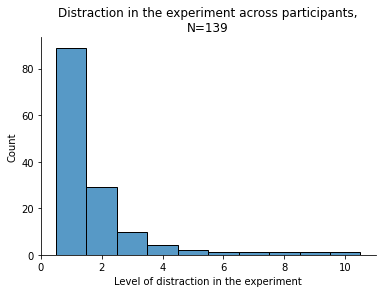

In [8]:
plt.Figure(figsize=(10,8))

sns.histplot(data=df_distraction["how_distracted"], discrete=True)
sns.despine()

plt.xlabel("Level of distraction in the experiment")
plt.title(f"Distraction in the experiment across participants,\nN={df_distraction.shape[0]}")

plt.show()

/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_21454/2897076522.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


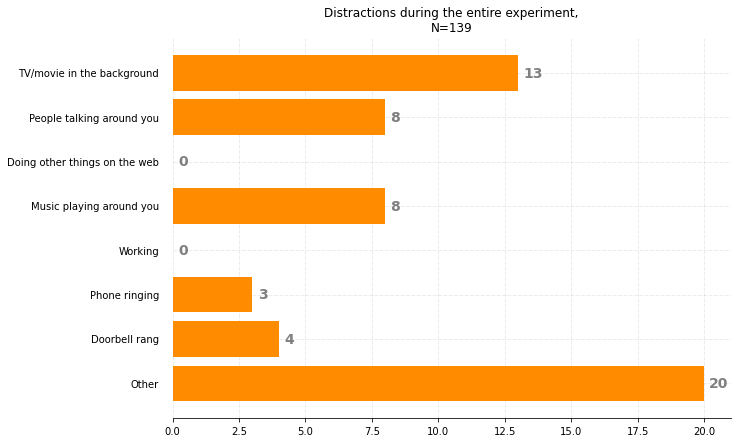

In [9]:
distractions = [
    "TV/movie in the background",
    "People talking around you",
    "Doing other things on the web",
    "Music playing around you",
    "Working",
    "Phone ringing",
    "Doorbell rang",
    "Other",
]

# add a helper col, convert other distraction to numeric
df_distraction["did_other_distraction"] = df_distraction["other_distraction"].isna().map({False:1, True:0})


# make it nice
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

fig, ax = plt.subplots(figsize =(10, 7))

# horizontal
ax.barh(distractions, df_distraction[[x for x in df_distraction.columns if x.startswith("did")]+['other_distraction']].sum(),
        color='darkorange', zorder=2)

# remove axes splines
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# remove y ticks
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.3)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             int(i.get_width()),
             fontsize = 14, fontweight ='bold',
             color ='gray')
    
# Add Plot Title
ax.set_title(f"Distractions during the entire experiment,\nN={df_distraction.shape[0]}")
 
# # Add Text watermark
# fig.text(0.9, 0.15, 'Janka', fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)
 
plt.show()

In [10]:
df_distraction[[x for x in df_distraction.columns if x.startswith("did")]+['other_distraction']].sum()

did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-TV/movie          13.0
did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-people_talking     8.0
did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-internet           0.0
did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-music              8.0
did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-working            0.0
did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-phone              3.0
did-any-of-the-following-distractions-occur-while-you-were-completing-these-tasks-doorbell           4.0
did_other_distraction                                                                                 20
dtype: object

### Emotions
[top](#top)

In [11]:
# thr for em/eq, 30 %
thr_miss_emeq = 18 
bad_girls = pd.DataFrame(columns=["userID", "num_missed"])

# Clean -- select only relevant data and columns
# correct is either true, false or missed
df_emo = df_emo_all[df_emo_all["correct"].notnull()][["block", "correct", "response", "correctResponse", 
                                                      "stim1", "stim2", "target", "RT", "userID", "observation",
                                                      "All Raters", 'gender_distractor',
                                                      'emotion_target', 'emotion1', 'emotion2',
                                                     "Form", 
                                                     ]]

# get the new and correct participants' count
N_participants = df_emo.userID.unique().size

# alert if some participants have to many misses
tmp_missed = df_emo[df_emo.correct=="missed"].groupby("userID").correct.value_counts().reset_index(level=1, drop=True)
if tmp_missed[tmp_missed>=thr_miss_emeq].any():
    for m in tmp_missed[tmp_missed>=thr_miss_emeq].index:
        print("\nParticipant {} had {} missed trials in faces.".format(m, tmp_missed[m]))
        warnings.warn("Participant {} had {} missed trials in faces.".format(m, tmp_missed[m])) #TODO
        bad_girls = bad_girls.append(pd.DataFrame({"userID":[m], "num_missed":[tmp_missed[m]]}))
        
        
# add order in which stimuli were presented
df_emo["order"]= np.tile(np.repeat([range(16,19)],num_trials_per_task),N_participants)#np.repeat([1,2,3,4,5,6],20)
        
# convert answers to boolean or nan
df_emo["correct_emotion_check_flt"] = [0 if (x.lower()=='false' or x=='0.0') else 1 \
                             if (x.lower()=='true' or x=='1.0')\
                             else np.nan for x in df_emo['correct'].astype(str)]
print(df_emo.dtypes)

# This creates a bool series where 1 is for a matching str in either column.
# Then this series is multiplied by 1, 2, 3 to match increasing difficulty (26 is easiest -- biggest difference)
# https://stackoverflow.com/questions/47181187/finding-string-over-multiple-columns-in-pandas
df_emo["difficulty"] = df_emo[["stim1", "stim2"]].applymap(lambda x: "-24p.png" in x).any(1).astype(int)*3+\
                        df_emo[["stim1", "stim2"]].applymap(lambda x: "-30p.png" in x).any(1).astype(int)*2+\
                        df_emo[["stim1", "stim2"]].applymap(lambda x: "-36p.png" in x).any(1).astype(int)*1

df_emo["levels"] = df_emo["difficulty"].replace({1: 36, 2: 30, 3:24})

# clean up
df_trials = None

df_emo    


Participant s_55 had 27 missed trials in faces.
block                          int32
correct                       object
response                      object
correctResponse               object
stim1                         object
stim2                         object
target                        object
RT                           float64
userID                        object
observation                   object
All Raters                   float64
gender_distractor             object
emotion_target                object
emotion1                      object
emotion2                      object
Form                          object
order                          int64
correct_emotion_check_flt    float64
dtype: object


/var/folders/bx/tb4883l53hdd3zp2y0nyy_4m0000gp/T/ipykernel_21454/4167621626.py:22: UserWarning: Participant s_55 had 27 missed trials in faces.
  warnings.warn("Participant {} had {} missed trials in faces.".format(m, tmp_missed[m])) #TODO


,block,correct,response,correctResponse,stim1,stim2,target,RT,userID,observation,All Raters,gender_distractor,emotion_target,emotion1,emotion2,Form,order,correct_emotion_check_flt,difficulty,levels
381,12,1.0,left,left,sharp_CFD-IF-730-410-N_AF01NES-24p.png,sharp_CFD-IF-730-410-N_AF01NES-0p.png,sharp_CFD-IF-730-410-N_AF01NES-0p.png,1244.063,s_245,9a4dd,94.0,m,angry,angry,fearful,A,16,1.0,3,24
388,12,1.0,left,left,sharp_CFD-BF-011-002-N_AF01NES-0p.png,sharp_CFD-BF-011-002-N_AF01NES-30p.png,sharp_CFD-BF-011-002-N_AF01NES-0p.png,1171.971,s_245,9a4dd,94.0,m,angry,angry,disgusted,A,16,1.0,2,30
395,12,1.0,left,left,sharp_London-M-131-03_m4018-0p.png,sharp_London-M-131-03_m4018-24p.png,sharp_London-M-131-03_m4018-0p.png,1102.548,s_245,9a4dd,97.0,f,neutral,neutral,happy,A,16,1.0,3,24
402,12,1.0,right,right,sharp_CFD-LM-207-004-N_m4018-36p.png,sharp_CFD-LM-207-004-N_m4018-0p.png,sharp_CFD-LM-207-004-N_m4018-0p.png,902.118,s_245,9a4dd,96.0,m,neutral,disgusted,neutral,A,16,1.0,1,36
409,12,1.0,left,left,sharp_Radiate-WF08-NC_AF01NES-0p.png,sharp_Radiate-WF08-NC_AF01NES-36p.png,sharp_Radiate-WF08-NC_AF01NES-0p.png,671.695,s_245,9a4dd,100.0,f,happy,happy,angry,A,16,1.0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207947,12,1.0,right,right,sharp_CFD-WF-250-167-N_AF01NES-36p.png,sharp_CFD-WF-250-167-N_AF01NES-0p.png,sharp_CFD-WF-250-167-N_AF01NES-0p.png,714.811,s_33,d92c0,100.0,f,happy,sad,happy,A,18,1.0,1,36
207954,12,1.0,left,left,sharp_M051C_m4018-0p.png,sharp_M051C_m4018-30p.png,sharp_M051C_m4018-0p.png,462.452,s_33,d92c0,100.0,m,happy,happy,neutral,A,18,1.0,2,30
207961,12,1.0,right,right,sharp_CFD-WF-213-031-N_AF01NES-0p.png,sharp_CFD-WF-213-031-N_AF01NES-30p.png,sharp_CFD-WF-213-031-N_AF01NES-0p.png,554.751,s_33,d92c0,98.0,m,angry,happy,angry,A,18,1.0,2,30
207968,12,1.0,left,left,sharp_CFD-WM-001-014-N_m4018-30p.png,sharp_CFD-WM-001-014-N_m4018-0p.png,sharp_CFD-WM-001-014-N_m4018-0p.png,513.977,s_33,d92c0,100.0,m,happy,happy,sad,A,18,1.0,2,30


In [12]:
bad_girls["percentage_missed"] = bad_girls.num_missed/60
bad_girls

,userID,num_missed,percentage_missed
0,s_55,27,0.45


In [13]:
set(bad_boys.userID)&set(bad_girls.userID)

{'s_55'}

In [14]:
pd.merge(bad_boys,bad_girls, how="outer", on="userID")

,userID,num_missed_x,percentage_missed_x,num_missed_y,percentage_missed_y
0,s_100,63,0.35,NaN,NaN
1,s_213,68,0.377778,NaN,NaN
2,s_238,71,0.394444,NaN,NaN
3,s_55,73,0.405556,27,0.45


## Merge the two
[top](#top)


In [15]:
# # add mapping for tasks
# task_dict = {0:"perception", 1:"blank", 2:"", 3:"faces"}
# df_clean["task"]=(df_clean.block-1)//3
# df_clean.replace({"task": task_dict}, inplace=True)
# convert boolean answers to floats to be able to do mean
df_clean['correct_flt'] = df_clean.correct_check.astype(float)

# add cols to emo to be able to easily concat
# df_emo["correct"] = df_emo["correct_faces"]
df_emo["correct_flt"] = df_emo["correct_emotion_check_flt"]
df_emo["task"] = "emotions"

# convert types for better processing
# df_clean = df_clean.convert_dtypes()
# df_emo = df_emo.convert_dtypes()

# df_clean.merge(df_emo, on="userID")
df_concat = pd.concat([df_clean, df_emo])

df_concat_clean = df_concat[["userID", "block", "correct", "correct_flt", "RT", "observation", "difficulty", "levels", "task", "response"]]

df_concat_clean

,userID,block,correct,correct_flt,RT,observation,difficulty,levels,task,response
41,s_245,5,1.0,1.0,1432.173,9a4dd,3,24,blank,right
46,s_245,5,1.0,1.0,1909.175,9a4dd,1,36,blank,right
51,s_245,5,1.0,1.0,1336.168,9a4dd,3,24,blank,right
56,s_245,5,1.0,1.0,1248.335,9a4dd,3,24,blank,left
61,s_245,5,1.0,1.0,1118.097,9a4dd,1,36,blank,right
...,...,...,...,...,...,...,...,...,...,...
207947,s_33,12,1.0,1.0,714.811,d92c0,1,36,emotions,right
207954,s_33,12,1.0,1.0,462.452,d92c0,2,30,emotions,left
207961,s_33,12,1.0,1.0,554.751,d92c0,2,30,emotions,right
207968,s_33,12,1.0,1.0,513.977,d92c0,2,30,emotions,left


## Quality checks
[top](#top)

* [Check for too short RT](#Check-for-too-short-RT)
* [Check for too many times pressing one key](#Check-for-too-many-times-pressing-one-key)

### Check for too short RT

In [16]:
df_concat_clean.groupby(["task"]).std()

,block,correct_flt,RT,difficulty,levels
task,,,,,
blank,0.816547,0.446854,576.640586,0.816547,4.899282
emotions,0.816547,0.295647,484.012794,0.816547,4.899282
faces,0.816547,0.478836,545.313880,0.816547,4.899282
perception,0.816547,0.362292,513.563441,0.816547,4.899282


In [17]:
# how many std from mean we want the outlier to be
num_std = -2.5 

# compute mean per participant per task, subtract mean per task, divide by std of the task, compare to thr
x = ((df_concat_clean.groupby(["userID", "task"]).mean().RT-df_concat_clean.groupby(["task"]).mean().RT)/df_concat_clean.groupby(["task"]).std().RT)< num_std

# get the corresponding ID
df_concat_clean.groupby(["userID", "task"]).mean().RT[x].reset_index()#.userID


,userID,task,RT


### Check for too many times pressing one key

### DO not run the below, skip to:
[here](#Find-it-in-the-df)

In [18]:
# flag for cell not to be run, switch if needed
simulate_cells = False

if simulate_cells:
    lengths = []
    num_steps = 15000
    max_lengths = np.zeros(num_steps, dtype=int)
    N_trials = 20

    for i in range(num_steps):
        # generate num of 0s and 1s
        num = np.random.randint(0, 2,size=N_trials)
        # convert the array into str, split it where there are zeros, get the length of the splits
        tmp_len = [len(sequence) for sequence in ''.join(str(x) for x in num).replace('0', ' ').split()]
        # append
        lengths.append(tmp_len)
        if tmp_len:
            max_lengths[i] = max(tmp_len)
        else:
            max_lengths[i] = 0

In [19]:
if simulate_cells:

    from pandas.core.common import flatten

    fig, axs = plt.subplots(1,3, figsize = (13,4))
    plt.subplots_adjust(wspace=0.4)

    sns.histplot(list(flatten(lengths)), ax=axs[0])
    sns.histplot(max_lengths, ax=axs[1], color="orange")
    sns.histplot(max_lengths, ax=axs[2], stat="probability", color="orange")

    axs[0].set_title("Distribution of lengths")
    axs[1].set_title("Distribution of max length")
    axs[1].set_ylabel('')

In [20]:
if simulate_cells:

    lengths = []
    num_steps = 15000
    max_lengths = np.zeros(num_steps, dtype=int)
    N_trials = num_trials_per_task * num_blocks * num_tasks
    # num_tasks = 3 # 
    # num_blocks = 3
    # num_trials_per_task = 20

    for i in range(num_steps):
        # generate num of 0s and 1s
        num = np.random.randint(0, 2,size=N_trials)
        # convert the array into str, split it where there are zeros, get the length of the splits
        tmp_len = [len(sequence) for sequence in ''.join(str(x) for x in num).replace('0', ' ').split()]
        # append
        lengths.append(tmp_len)
        if tmp_len:
            max_lengths[i] = max(tmp_len)
        else:
            max_lengths[i] = 0


In [21]:
if simulate_cells:
    from pandas.core.common import flatten

    fig, axs = plt.subplots(1,3, figsize = (13,4))
    plt.subplots_adjust(wspace=0.4)

    sns.histplot(list(flatten(lengths)), ax=axs[0], color='b', binwidth=1)
    sns.histplot(max_lengths, ax=axs[1], color="orange")
    sns.histplot(max_lengths, ax=axs[2], stat="probability", color="orange")

    axs[0].set_title("Distribution of lengths")
    axs[1].set_title(f"Distribution of max length, N of trials = {N_trials}")
    axs[1].set_ylabel('')

In [22]:
if simulate_cells:
    print("mean trial length", np.array(list(flatten(lengths))).mean())

In [23]:
if simulate_cells:
    fig, axs = plt.subplots(1,2)

    x,y,_ = axs[0].hist(max_lengths, bins=range(min(max_lengths), max(max_lengths) + 1, 1))

    prob = x/x.sum()

    axs[1].plot(y[1:],prob)
    axs[1].scatter(y[1:],prob)
    np.where(prob<0.1)

#### Across (for) the participant

In [24]:
# replace() needs to be there otherwise we get a lot of '' strings in the ourput, the other replace is to have easier counting

subsequence_lengths_partic_L = []
subsequence_lengths_partic_R = []
max_lengths_partic = np.zeros(len(df_clean.userID.unique()))
avg_lengths_partic = np.zeros(len(df_clean.userID.unique()))
min_lengths_partic = np.zeros(len(df_clean.userID.unique()))
flagged_participants = []

# fig, axs = plt.subplots(len(df_clean.userID.unique()),2, figsize = (10,10*len(df_clean.userID.unique())//2))
# plt.subplots_adjust(wspace=0.4, hspace=0.3)

for i, partic in enumerate(df_clean.userID.unique()):
    tmp_list_R = None
    tmp_len_R = None
    # get a list of l's for the participant, remove nans, see more above
    tmp_list_R = ''.join(df_clean[df_clean.userID==partic].response.dropna().tolist()).replace('left',' ').replace("right", "r").split()
    # get the length of the splits
    tmp_len_R = [len(sequence) for sequence in tmp_list_R]
    # append
    subsequence_lengths_partic_R.append(tmp_len_R)

    tmp_list_L = None
    tmp_len_L = None
    # get a list of l's for the participant, remove nans, see more above
    tmp_list_L = ''.join(df_clean[df_clean.userID==partic].response.dropna().tolist()).replace('right',' ').replace("left", "l").split()
    # get the length of the splits
    tmp_len_L = [len(sequence) for sequence in tmp_list_L]
    # append
    subsequence_lengths_partic_L.append(tmp_len_L)
    
    if tmp_len_L or tmp_len_R:
        # add just the max
        max_lengths_partic[i] = max(max(tmp_len_R), max(tmp_len_L))
        min_lengths_partic[i] = min(min(tmp_len_R), min(tmp_len_L))
        avg_lengths_partic[i] = np.array(tmp_len_R+tmp_len_R).mean()
    else:
        max_lengths_partic[i] = 0
        min_lengths_partic[i] = 0                

#     if max_lengths_partic[i]>7:
#         print(f"Check participant {partic} because the longest sequence is: {max_lengths_partic[i]}")
    if max_lengths_partic[i]>10:
        print(f"Check participant {partic} because the longest sequence is: {max_lengths_partic[i]}") 
        flagged_participants.append(partic)
    
#     # plot the results
#     sns.histplot(list(flatten(lengths)), ax=axs[i,0], color='lightblue', binwidth=1, label="simulated", stat="probability")
#     sns.histplot(list(flatten(subsequence_lengths_partic_L)), ax=axs[i,0], color='darkblue', binwidth=1, label="data L", stat="probability", alpha=0.3)
#     sns.histplot(list(flatten(subsequence_lengths_partic_R)), ax=axs[i,0], color='blue', binwidth=1, label="data R", stat="probability", alpha=0.3)
    
#     sns.histplot(max_lengths, ax=axs[i,1], color="orange", label="simulated", stat="probability", binwidth=1)
#     axs[i,1].axvline(max_lengths_partic[i], label="max length for participant", c='k')

#     axs[i,0].set_title(f"Distribution of lengths, {partic}")
#     axs[i,1].set_title(f"Distribution of max length, N of trials = {N_trials}")
#     axs[i,1].set_ylabel('')       
#     axs[i,0].legend()
#     axs[i,1].legend()    

Check participant s_137 because the longest sequence is: 16.0
Check participant s_227 because the longest sequence is: 11.0
Check participant s_55 because the longest sequence is: 16.0
Check participant s_197 because the longest sequence is: 24.0
Check participant s_134 because the longest sequence is: 11.0
Check participant s_143 because the longest sequence is: 15.0
Check participant s_120 because the longest sequence is: 20.0
Check participant s_255 because the longest sequence is: 11.0
Check participant s_171 because the longest sequence is: 12.0
Check participant s_112 because the longest sequence is: 15.0
Check participant s_204 because the longest sequence is: 37.0
Check participant s_150 because the longest sequence is: 18.0
Check participant s_21 because the longest sequence is: 15.0
Check participant s_130 because the longest sequence is: 13.0
Check participant s_60 because the longest sequence is: 11.0
Check participant s_187 because the longest sequence is: 12.0
Check parti

idx of outliers:  (array([ 50,  61,  79,  82, 106]),)
values:  [3.41935484 3.56666667 3.13157895 3.43333333 3.09677419]
in std:  [3.89395557 4.29586256 3.10882416 3.93209273 3.01386727]


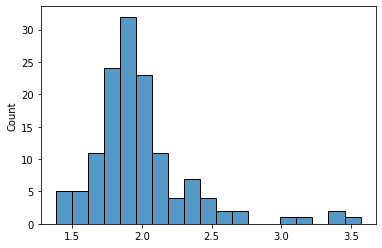

In [25]:
sns.histplot(avg_lengths_partic)
print("idx of outliers: ", np.where(avg_lengths_partic>(2.5*avg_lengths_partic.std())+avg_lengths_partic.mean()))
print("values: ", avg_lengths_partic[np.where(avg_lengths_partic>(2.5*avg_lengths_partic.std())+avg_lengths_partic.mean())])
print("in std: ", (avg_lengths_partic[np.where(avg_lengths_partic>(2.5*avg_lengths_partic.std())+avg_lengths_partic.mean())] - avg_lengths_partic.mean())/avg_lengths_partic.std())

idx of outliers:  (array([ 51,  56,  82, 126]),)
values:  [24. 20. 37. 19.]
in std:  [3.93314508 2.91595238 7.23902133 2.66165421]


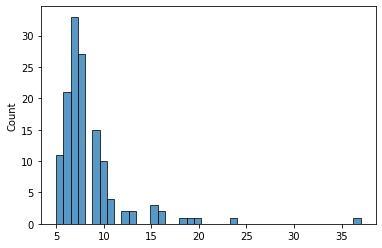

In [26]:
sns.histplot(max_lengths_partic)
print("idx of outliers: ", np.where(max_lengths_partic>(2.5*max_lengths_partic.std())+max_lengths_partic.mean()))
print("values: ", max_lengths_partic[np.where(max_lengths_partic>(2.5*max_lengths_partic.std())+max_lengths_partic.mean())])
print("in std: ", (max_lengths_partic[np.where(max_lengths_partic>(2.5*max_lengths_partic.std())+max_lengths_partic.mean())] - max_lengths_partic.mean())/max_lengths_partic.std())


In [27]:
# merge the two measures into one df -- look at max and avg length, find the outliers (2.5 std), merge dfs 
num_std = 2.5 

df_flagged_length_task = pd.merge(
pd.DataFrame({
    "userID": df_clean.userID.unique()[np.where(avg_lengths_partic>(num_std*avg_lengths_partic.std())+avg_lengths_partic.mean())],
    "avg_length_task_std": (avg_lengths_partic[np.where(avg_lengths_partic>(num_std*avg_lengths_partic.std())+avg_lengths_partic.mean())] - avg_lengths_partic.mean())/avg_lengths_partic.std()
}),
pd.DataFrame({
    "userID": df_clean.userID.unique()[np.where(max_lengths_partic>(num_std*max_lengths_partic.std())+max_lengths_partic.mean())],
    "max_length_task_std": (max_lengths_partic[np.where(max_lengths_partic>(num_std*max_lengths_partic.std())+max_lengths_partic.mean())] - max_lengths_partic.mean())/max_lengths_partic.std()
}),
    on = "userID", how="outer"
)

df_flagged_length_task

,userID,avg_length_task_std,max_length_task_std
0,s_55,3.893956,NaN
1,s_171,4.295863,NaN
2,s_88,3.108824,NaN
3,s_204,3.932093,7.239021
4,s_60,3.013867,NaN
5,s_197,NaN,3.933145
6,s_120,NaN,2.915952
7,s_225,NaN,2.661654


In [28]:
# add accuracy
df_flagged_length_task = pd.merge( df_flagged_length_task,
(df_clean.loc[df_clean.userID.isin(df_flagged_length_task.userID)].groupby("userID").mean()).loc[:,["RT","correct_flt"]].reset_index(), 
on="userID", how="outer")

# rename cols
# df_flagged_length_task

# add std acc, rename with suffixes. BE CAREFUL with this

df_flagged_length_task = pd.merge( df_flagged_length_task,
((df_clean[df_clean.userID.isin(df_flagged_length_task.userID)].groupby("userID").mean()-df_concat_clean.mean())/df_concat_clean.std()).loc[:,["RT","correct_flt"]].reset_index(),
on="userID", how="outer", suffixes=["_absolute", "_std"])


df_flagged_length_task

,userID,avg_length_task_std,max_length_task_std,RT_absolute,correct_flt_absolute,RT_std,correct_flt_std
0,s_55,3.893956,NaN,1568.654329,0.552632,0.146023,-0.547796
1,s_171,4.295863,NaN,1662.552694,0.535032,0.311123,-0.590259
2,s_88,3.108824,NaN,1558.844638,0.694915,0.128775,-0.204506
3,s_204,3.932093,7.239021,1520.626465,0.611765,0.061576,-0.405125
4,s_60,3.013867,NaN,1126.484972,0.559322,-0.631437,-0.531654
5,s_197,NaN,3.933145,781.108480,0.670391,-1.238708,-0.263676
6,s_120,NaN,2.915952,1872.074327,0.555556,0.679522,-0.540741
7,s_225,NaN,2.661654,1254.333803,0.595506,-0.406643,-0.444353


#### Look at accuracy of those subjects

In [29]:
# Look at group avg
df_clean.mean()

block               6.000000
RT               1602.151936
All Raters         95.416667
familiarity              NaN
target_memory            NaN
order               6.000000
correct_check       0.737745
difficulty          2.000000
levels             30.000000
correct_flt         0.737745
dtype: float64

In [30]:
df_clean[df_clean.userID.isin(flagged_participants)].groupby("userID").mean()

,block,RT,All Raters,order,difficulty,levels,correct_flt
userID,,,,,,,
s_112,6,1519.460144,95.416667,6,2,30,0.598802
s_120,6,1872.074327,95.416667,6,2,30,0.555556
s_126,6,1874.487784,95.416667,6,2,30,0.721591
s_130,6,1527.158891,95.416667,6,2,30,0.714286
s_134,6,1535.748333,95.416667,6,2,30,0.827778
s_137,6,1806.976421,95.416667,6,2,30,0.797753
s_143,6,1359.580528,95.416667,6,2,30,0.713483
s_150,6,1487.878822,95.416667,6,2,30,0.744444
s_171,6,1662.552694,95.416667,6,2,30,0.535032


In [31]:
# check how far is the mean
((df_clean[df_clean.userID.isin(flagged_participants)].groupby("userID").mean()-df_concat_clean.mean())/df_concat_clean.std()).loc[:,["RT","correct_flt"]]


,RT,correct_flt
userID,,
s_112,0.059526,-0.436399
s_120,0.679522,-0.540741
s_126,0.683766,-0.140145
s_130,0.073062,-0.157771
s_134,0.088165,0.116053
s_137,0.565061,0.043611
s_143,-0.221589,-0.159707
s_150,0.003996,-0.085006
s_171,0.311123,-0.590259


In [32]:
# df_clean.loc[df_clean.userID.isin(['s_110', 's_36', 's_160']),
#             ["userID","RT","correct_flt"]]
          
          
(df_clean.loc[df_clean.userID.isin(['s_197', 's_60', 's_55', 's_120', 's_171'])].groupby("userID").mean()).loc[:,["RT","correct_flt"]].reset_index()



,userID,RT,correct_flt
0,s_120,1872.074327,0.555556
1,s_171,1662.552694,0.535032
2,s_197,781.108480,0.670391
3,s_55,1568.654329,0.552632
4,s_60,1126.484972,0.559322


In [33]:
# how many std from mean we want the outlier to be
num_std = -2.5 

# compute mean per participant per task, subtract mean per task, divide by std of the task, compare to thr
x = ((df_clean[df_clean.userID.isin(flagged_participants)].groupby("userID").mean()-df_concat_clean.mean())/df_concat_clean.std()).loc[:,["RT","correct_flt"]]< num_std

# get the corresponding ID
((df_clean[df_clean.userID.isin(flagged_participants)].groupby("userID").mean()-df_concat_clean.mean())/df_concat_clean.std()).loc[x["correct_flt"]]


,All Raters,RT,block,correct_flt,difficulty,levels,order
userID,,,,,,,


#### Across the participants per block

In [34]:
flagged_participants_subtasks={'blank':[], 'faces':[], 'perception':[], 'emotions':[]}
length_participants_subtasks_data={'blank':[], 'faces':[], 'perception':[], 'emotions':[]}

# replace() needs to be there otherwise we get a lot of '' strings in the ourput, the other replace is to have easier counting

for task in df_concat_clean.task.unique():

    subsequence_lengths_partic_L = []
    subsequence_lengths_partic_R = []
    max_lengths_partic = np.zeros(len(df_concat_clean.userID.unique()))
    avg_lengths_partic = np.zeros(len(df_concat_clean.userID.unique()))
    min_lengths_partic = np.zeros(len(df_concat_clean.userID.unique()))

#     fig, axs = plt.subplots(len(df_clean.userID.unique()),2, figsize = (13,10))
#     plt.subplots_adjust(wspace=0.4, hspace=0.3)

    for i, partic in enumerate(df_concat_clean.userID.unique()):
        tmp_list_R = None
        tmp_len_R = None
        # get a list of l's for the participant, remove nans, see more above
        tmp_list_R = ''.join(df_concat_clean[(df_concat_clean.userID==partic)&(df_concat_clean.task==task)].response.dropna().tolist()).replace('left',' ').replace("right", "r").split()
        # get the length of the splits
        tmp_len_R = [len(sequence) for sequence in tmp_list_R]
        # append
        subsequence_lengths_partic_R.append(tmp_len_R)

        tmp_list_L = None
        tmp_len_L = None
        # get a list of l's for the participant, remove nans, see more above
        tmp_list_L = ''.join(df_concat_clean[(df_concat_clean.userID==partic)&(df_concat_clean.task==task)].response.dropna().tolist()).replace('right',' ').replace("left", "l").split()
        # get the length of the splits
        tmp_len_L = [len(sequence) for sequence in tmp_list_L]
        # append
        subsequence_lengths_partic_L.append(tmp_len_L)

        if tmp_len_L or tmp_len_R:
            if not tmp_len_L:
                tmp_len_L = [0]
            if not tmp_len_R:
                tmp_len_R = [0]                
            # add just the max
            max_lengths_partic[i] = max(max(tmp_len_R), max(tmp_len_L))
            min_lengths_partic[i] = min(min(tmp_len_R), min(tmp_len_L))
            avg_lengths_partic[i] = np.array(tmp_len_R+tmp_len_R).mean()
        else:
            max_lengths_partic[i] = 0
            min_lengths_partic[i] = 0                
            
#         if max_lengths_partic[i]>5:
#             print(f"Check participant {partic} because the longest sequence is: {max_lengths_partic[i]} in task: {task}")
        if max_lengths_partic[i]>10:
            print(f"Check participant {partic} because the longest sequence is: {max_lengths_partic[i]} in task: {task}")
            flagged_participants_subtasks[task].append(partic)
            
#         # plot the results
#         sns.histplot(list(flatten(lengths)), ax=axs[i,0], color='lightblue', binwidth=1, label="simulated", stat="probability")
#         sns.histplot(list(flatten(subsequence_lengths_partic_L)), ax=axs[i,0], color='darkblue', binwidth=1, label="data L", stat="probability", alpha=0.3)
#         sns.histplot(list(flatten(subsequence_lengths_partic_R)), ax=axs[i,0], color='blue', binwidth=1, label="data R", stat="probability", alpha=0.3)

#         sns.histplot(max_lengths, ax=axs[i,1], color="orange", label="simulated", stat="probability", binwidth=1)
#         axs[i,1].axvline(max_lengths_partic[i], label="max length for participant", c='k')

#         axs[i,0].set_title(f"Distribution of lengths, {partic}")
#         axs[i,1].set_title(f"Distribution of max length, N of trials = {N_trials}")
#         axs[i,1].set_ylabel('')       
#         axs[i,0].legend()
#         axs[i,1].legend()    


    # append to full score
    length_participants_subtasks_data[task].append([avg_lengths_partic, max_lengths_partic])

Check participant s_227 because the longest sequence is: 11.0 in task: blank
Check participant s_171 because the longest sequence is: 12.0 in task: blank
Check participant s_187 because the longest sequence is: 12.0 in task: blank
Check participant s_137 because the longest sequence is: 16.0 in task: faces
Check participant s_55 because the longest sequence is: 16.0 in task: faces
Check participant s_197 because the longest sequence is: 24.0 in task: faces
Check participant s_134 because the longest sequence is: 11.0 in task: faces
Check participant s_120 because the longest sequence is: 20.0 in task: faces
Check participant s_204 because the longest sequence is: 37.0 in task: faces
Check participant s_150 because the longest sequence is: 18.0 in task: faces
Check participant s_21 because the longest sequence is: 15.0 in task: faces
Check participant s_130 because the longest sequence is: 13.0 in task: faces
Check participant s_60 because the longest sequence is: 11.0 in task: faces
Ch


Task:  blank
avg:
idx of outliers:  (array([21, 34, 79]),)
values:  [3.72727273 3.27272727 3.81818182]
in std:  [3.66677699 2.69305551 3.86152129]

max:
idx of outliers:  (array([ 42,  61, 109]),)
values:  [11. 12. 12.]
in std:  [2.85007874 3.45695671 3.45695671]

Task:  faces
avg:
idx of outliers:  (array([82]),)
values:  [27.5]
in std:  [10.88077523]

max:
idx of outliers:  (array([ 51,  56,  82,  92, 126]),)
values:  [24. 20. 37. 18. 19.]
in std:  [3.92388096 2.98673115 6.96961784 2.51815625 2.7524437 ]

Task:  perception
avg:
idx of outliers:  (array([18, 50, 61]),)
values:  [4.1        4.44444444 4.22222222]
in std:  [4.6033201  5.32735527 4.86023581]

max:
idx of outliers:  (array([54, 66]),)
values:  [15. 15.]
in std:  [4.99998491 4.99998491]

Task:  emotions
avg:
idx of outliers:  (array([50]),)
values:  [3.83333333]
in std:  [5.45223848]

max:
idx of outliers:  (array([59]),)
values:  [11.]
in std:  [3.88015646]


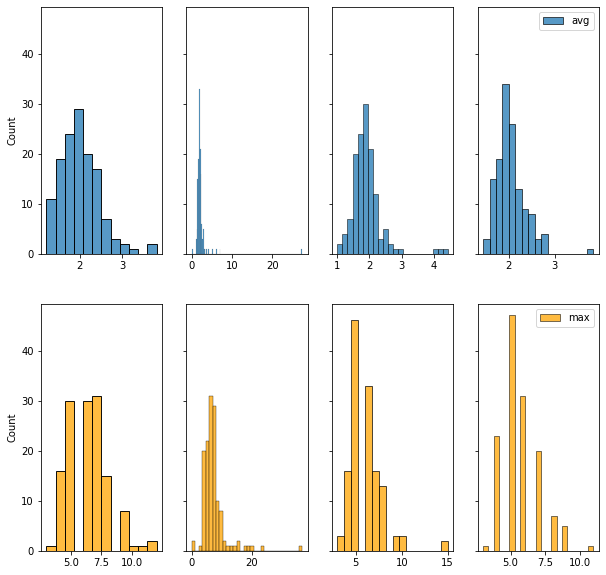

In [35]:
num_std = 2.5

fig, axs = plt.subplots(2,4, figsize=(10,10), sharey=True)

for j, tsk in enumerate(length_participants_subtasks_data.keys()):
    sns.histplot(length_participants_subtasks_data[tsk][0][0], ax=axs[0,j], label="avg")
    sns.histplot(length_participants_subtasks_data[tsk][0][1], ax=axs[1,j], color='orange', label="max")
    
    print("\nTask: ", tsk)
    print("avg:")
    print("idx of outliers: ", np.where(length_participants_subtasks_data[tsk][0][0]>(num_std*length_participants_subtasks_data[tsk][0][0].std())+length_participants_subtasks_data[tsk][0][0].mean()))
    print("values: ", length_participants_subtasks_data[tsk][0][0][np.where(length_participants_subtasks_data[tsk][0][0]>(num_std*length_participants_subtasks_data[tsk][0][0].std())+length_participants_subtasks_data[tsk][0][0].mean())])
    print("in std: ", (length_participants_subtasks_data[tsk][0][0][np.where(length_participants_subtasks_data[tsk][0][0]>(num_std*length_participants_subtasks_data[tsk][0][0].std())+length_participants_subtasks_data[tsk][0][0].mean())] - length_participants_subtasks_data[tsk][0][0].mean())/length_participants_subtasks_data[tsk][0][0].std())
    print("\nmax:")
    print("idx of outliers: ", np.where(length_participants_subtasks_data[tsk][0][1]>(num_std*length_participants_subtasks_data[tsk][0][1].std())+length_participants_subtasks_data[tsk][0][1].mean()))
    print("values: ", length_participants_subtasks_data[tsk][0][1][np.where(length_participants_subtasks_data[tsk][0][1]>(num_std*length_participants_subtasks_data[tsk][0][1].std())+length_participants_subtasks_data[tsk][0][1].mean())])
    print("in std: ", (length_participants_subtasks_data[tsk][0][1][np.where(length_participants_subtasks_data[tsk][0][1]>(num_std*length_participants_subtasks_data[tsk][0][1].std())+length_participants_subtasks_data[tsk][0][1].mean())] - length_participants_subtasks_data[tsk][0][1].mean())/length_participants_subtasks_data[tsk][0][1].std())


axs[0,-1].legend()
axs[1,-1].legend()

In [36]:
# both sides
tsk = "faces"
(length_participants_subtasks_data[tsk][0][0][np.where((length_participants_subtasks_data[tsk][0][0]>(num_std*length_participants_subtasks_data[tsk][0][0].std()
                                                        +length_participants_subtasks_data[tsk][0][0].mean()))
        | (length_participants_subtasks_data[tsk][0][0]<(-num_std*length_participants_subtasks_data[tsk][0][0].std()
                                                         +length_participants_subtasks_data[tsk][0][0].mean()))
        )] - length_participants_subtasks_data[tsk][0][0].mean())/length_participants_subtasks_data[tsk][0][0].std()



array([10.88077523])

In [37]:
np.where((length_participants_subtasks_data[tsk][0][0]>(num_std*length_participants_subtasks_data[tsk][0][0].std()
                                                        +length_participants_subtasks_data[tsk][0][0].mean()))
        | (length_participants_subtasks_data[tsk][0][0]<(-num_std*length_participants_subtasks_data[tsk][0][0].std()
                                                         +length_participants_subtasks_data[tsk][0][0].mean()))
        )

(array([82]),)

In [38]:
# merge the two measures into one df -- look at max and avg length, find the outliers (2.5 std), merge dfs 
num_std = 2.5 
flagged_length_subtask_list = []

for i, tsk in enumerate(length_participants_subtasks_data.keys()):

    flag_idx_avg = None
    flag_idx_max = None
    # get idx if it is 2.5 std any direction
    flag_idx_avg = np.where((length_participants_subtasks_data[tsk][0][0]>(num_std*length_participants_subtasks_data[tsk][0][0].std()
                                                            +length_participants_subtasks_data[tsk][0][0].mean()))
            | (length_participants_subtasks_data[tsk][0][0]<(-num_std*length_participants_subtasks_data[tsk][0][0].std()
                                                             +length_participants_subtasks_data[tsk][0][0].mean()))
            )

    flag_idx_max = np.where((length_participants_subtasks_data[tsk][0][1]>(num_std*length_participants_subtasks_data[tsk][0][1].std()
                                                            +length_participants_subtasks_data[tsk][0][1].mean()))
            | (length_participants_subtasks_data[tsk][0][1]<(-num_std*length_participants_subtasks_data[tsk][0][1].std()
                                                             +length_participants_subtasks_data[tsk][0][1].mean()))
            )

    flagged_length_subtask_list.append(pd.merge(
    pd.DataFrame({
        "userID": df_concat_clean.userID.unique()[np.where(avg_lengths_partic>(num_std*avg_lengths_partic.std())+avg_lengths_partic.mean())],
        "avg_length_subtask_std": (avg_lengths_partic[np.where(avg_lengths_partic>(num_std*avg_lengths_partic.std())+avg_lengths_partic.mean())] - avg_lengths_partic.mean())/avg_lengths_partic.std(),
        "subtask_avg": tsk
    }),
    pd.DataFrame({
        "userID": df_concat_clean.userID.unique()[np.where(max_lengths_partic>(num_std*max_lengths_partic.std())+max_lengths_partic.mean())],
        "max_length_subtask_std": (max_lengths_partic[np.where(max_lengths_partic>(num_std*max_lengths_partic.std())+max_lengths_partic.mean())] - max_lengths_partic.mean())/max_lengths_partic.std(),
        "subtask_max": tsk
    }),
        on = "userID", how="outer"
    ))

    # add acc, rename with suffixes. BE CAREFUL with this -- order of df (and hence suffixes) can change
    flagged_length_subtask_list[i] = pd.merge( flagged_length_subtask_list[i],
    df_concat_clean[(df_concat_clean.userID.isin(flagged_length_subtask_list[i].userID)) & (df_concat_clean.task==tsk)].groupby("userID").mean().loc[:,["RT","correct_flt"]].reset_index(),
    on="userID", how="outer", suffixes=["_absolute", "_std"])
    
    # and standardised score
    flagged_length_subtask_list[i] = pd.merge( flagged_length_subtask_list[i],
    ((df_concat_clean[(df_concat_clean.userID.isin(flagged_length_subtask_list[i].userID)) & (df_concat_clean.task==tsk)].groupby("userID").mean()
    -df_concat_clean[df_concat_clean.task==tsk].mean())/df_concat_clean[df_concat_clean.task==tsk].mean().std()).loc[:,["RT","correct_flt"]],
    on="userID", how="outer", suffixes=["_absolute", "_std"])    
    

# df_flagged_length_subtask = pd.merge(flagged_length_subtask_list[0], flagged_length_subtask_list[1], on = ["userID","subtask_avg", "subtask_max"], how="outer")
# df_flagged_length_subtask = pd.merge(df_flagged_length_subtask, flagged_length_subtask_list[2], on = ["userID","subtask_avg", "subtask_max"], how="outer")

# merge on all keys

df_flagged_length_subtask = pd.merge(flagged_length_subtask_list[0], flagged_length_subtask_list[1], on = list(flagged_length_subtask_list[0].keys()), how="outer")
df_flagged_length_subtask = pd.merge(df_flagged_length_subtask, flagged_length_subtask_list[2], on = list(flagged_length_subtask_list[0].keys()), how="outer")

df_flagged_length_subtask

,userID,avg_length_subtask_std,subtask_avg,max_length_subtask_std,subtask_max,RT_absolute,correct_flt_absolute,RT_std,correct_flt_std
0,s_55,5.452238,blank,NaN,NaN,1705.651857,0.696429,0.086642,-0.000038
1,s_94,NaN,NaN,3.880156,blank,2144.478655,0.827586,0.687469,0.000141
2,s_55,5.452238,faces,NaN,NaN,1506.560190,0.476190,-0.164159,-0.000232
3,s_94,NaN,NaN,3.880156,faces,1819.230850,0.566667,0.268919,-0.000107
4,s_55,5.452238,perception,NaN,NaN,1474.878259,0.462963,-0.092831,-0.000558
5,s_94,NaN,NaN,3.880156,perception,1601.440569,0.896552,0.092146,0.000076


#### Look at accuracy of those subjects

In [39]:
flagged_participants_subtasks

{'blank': ['s_227', 's_171', 's_187'],
 'faces': ['s_137',
  's_55',
  's_197',
  's_134',
  's_120',
  's_204',
  's_150',
  's_21',
  's_130',
  's_60',
  's_126',
  's_225'],
 'perception': ['s_143', 's_112'],
 'emotions': ['s_94']}

In [40]:
# Look at group avg
df_concat_clean.groupby(["task"]).mean()

,block,correct_flt,RT,difficulty,levels
task,,,,,
blank,5,0.724381,1642.370943,2,30
emotions,11,0.903242,1142.167710,2,30
faces,11,0.644033,1625.078867,2,30
perception,2,0.844618,1538.393894,2,30


In [41]:
tsk = list(flagged_participants_subtasks.keys())[0]
df_concat_clean[(df_concat_clean.userID.isin(flagged_participants_subtasks[tsk])) & (df_concat_clean.task==tsk)].groupby("userID").mean()


,block,correct_flt,RT,difficulty,levels
userID,,,,,
s_171,5,0.632653,1894.955939,2,30
s_187,5,0.600000,1620.086533,2,30
s_227,5,0.550000,994.048617,2,30


#### Do it for all tasks

In [42]:
# how many std from mean we want the outlier to be
num_std = -2.5 

for tsk in list(flagged_participants_subtasks.keys()):
#     ((df_clean[(df_clean.userID.isin(flagged_participants_subtasks[tsk])) & (df_clean.task==tsk)].groupby("userID").mean()
#   -df_clean[df_clean.task==tsk].mean())/df_clean[df_clean.task==tsk].mean().std()).loc[:,["RT","correct_flt"]]
    x = ((df_concat_clean[(df_concat_clean.userID.isin(flagged_participants_subtasks[tsk])) & (df_concat_clean.task==tsk)].groupby("userID").mean()
  -df_concat_clean[df_concat_clean.task==tsk].mean())/df_concat_clean[df_concat_clean.task==tsk].mean().std()).loc[:,["RT","correct_flt"]]
    y = x< num_std

    if y.correct_flt.any():
        print(tsk)
        print(x[y])
    else:
        print(f"{tsk} has no outliers")

blank has no outliers
faces has no outliers
perception has no outliers
emotions has no outliers


In [43]:
(df_concat_clean[(df_concat_clean.userID.isin(['s_197', 's_60', 's_55', 's_120', 's_171'])) & (df_concat_clean.task=='faces')].groupby("userID").mean()).loc[:,["RT","correct_flt"]].reset_index()



,userID,RT,correct_flt
0,s_120,1358.443072,0.517857
1,s_171,1311.426200,0.490909
2,s_197,532.619533,0.550000
3,s_55,1506.560190,0.476190
4,s_60,932.641456,0.438596


In [44]:
(df_concat_clean[(df_concat_clean.userID.isin(['s_197', 's_60', 's_55', 's_120', 's_171'])) & (df_concat_clean.task=='perception')].groupby("userID").mean()).loc[:,["RT","correct_flt"]].reset_index()



,userID,RT,correct_flt
0,s_120,2169.630289,0.730769
1,s_171,1812.065868,0.490566
2,s_197,1222.266373,0.915254
3,s_55,1474.878259,0.462963
4,s_60,1319.201033,0.700000


## List of dropped participants

1. Look at signal detection theory and deal with missed trials (count them in)
2. Check where they miss trials (which trial)
3. Make a screen with "you're too slow" if they're timed out in the real experiment

## Who to exclude

a) exclude all who have more than 30 % missed trials (since there would not be enough data to compare them)

b) exclude all who have significantly missed a lot of data in a specific subtask (as a)) even if their performance is good or if they passed a)


#### Missed trials in general

In [45]:
exclude_miss = list(set(bad_boys.userID)|set(bad_girls.userID))
exclude_miss

['s_100', 's_55', 's_213', 's_238']

#### flags in general

In [46]:
df_flagged_length_task

,userID,avg_length_task_std,max_length_task_std,RT_absolute,correct_flt_absolute,RT_std,correct_flt_std
0,s_55,3.893956,NaN,1568.654329,0.552632,0.146023,-0.547796
1,s_171,4.295863,NaN,1662.552694,0.535032,0.311123,-0.590259
2,s_88,3.108824,NaN,1558.844638,0.694915,0.128775,-0.204506
3,s_204,3.932093,7.239021,1520.626465,0.611765,0.061576,-0.405125
4,s_60,3.013867,NaN,1126.484972,0.559322,-0.631437,-0.531654
5,s_197,NaN,3.933145,781.108480,0.670391,-1.238708,-0.263676
6,s_120,NaN,2.915952,1872.074327,0.555556,0.679522,-0.540741
7,s_225,NaN,2.661654,1254.333803,0.595506,-0.406643,-0.444353


In [47]:
df_flagged_length_task.loc[~df_flagged_length_task.max_length_task_std.isnull(), "userID"].values

array(['s_204', 's_197', 's_120', 's_225'], dtype=object)

In [48]:
exclude_task = [
    's_55', #'s_120','s_137',
    's_197',
    's_171',
               ]


#### flags per subtask

In [49]:
# do not look at the one already excluded anyway
df_flagged_length_subtask[~df_flagged_length_subtask.userID.isin(exclude_miss+exclude_task)]

,userID,avg_length_subtask_std,subtask_avg,max_length_subtask_std,subtask_max,RT_absolute,correct_flt_absolute,RT_std,correct_flt_std
1,s_94,NaN,NaN,3.880156,blank,2144.478655,0.827586,0.687469,0.000141
3,s_94,NaN,NaN,3.880156,faces,1819.230850,0.566667,0.268919,-0.000107
5,s_94,NaN,NaN,3.880156,perception,1601.440569,0.896552,0.092146,0.000076


#### Combine the excluded participants

In [50]:
excluded_ptc = list(set(exclude_miss+exclude_task))

print(f"Excluding {len(excluded_ptc)} participants.")

pd.DataFrame({"exclude":excluded_ptc}).to_csv(os.path.join(path_results, 'exclude_fmp_standalone_ptc.csv'), index=False)

Excluding 6 participants.


In [51]:
set(bad_boys.userID)&set(excluded_ptc)#&set(bad_girls)

{'s_100', 's_213', 's_238', 's_55'}

In [52]:
df_bad_boys = pd.merge(bad_boys, (df_concat_clean[df_concat_clean.userID.isin(bad_boys.userID)].groupby("userID").mean()).loc[:,["RT","correct_flt"]].reset_index(), how='outer', on='userID')
df_bad_boys = pd.merge(df_bad_boys, 
                         ((df_concat_clean[df_concat_clean.userID.isin(bad_boys.userID)].groupby("userID").mean()-df_concat_clean.mean())/df_concat_clean.std()).loc[:,["RT","correct_flt"]].reset_index(),
                        how='outer', on='userID', suffixes=["_absolute", "_std"])

df_bad_girls = pd.merge(bad_girls, (df_concat_clean[df_concat_clean.userID.isin(bad_girls.userID)].groupby("userID").mean()).loc[:,["RT","correct_flt"]].reset_index(), how='outer', on='userID')
df_bad_girls = pd.merge(df_bad_girls, 
                         ((df_concat_clean[df_concat_clean.userID.isin(df_bad_girls.userID)].groupby("userID").mean()-df_concat_clean.mean())/df_concat_clean.std()).loc[:,["RT","correct_flt"]].reset_index(),
                        how='outer', on='userID', suffixes=["_absolute", "_std"])

<AxesSubplot: xlabel='correct', ylabel='Count'>

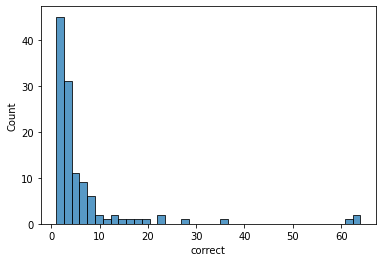

In [53]:
sns.histplot(df_clean[df_clean.correct=="missed"].groupby("userID").correct.value_counts())

In [54]:
df_all_flagged_problems = pd.merge(df_bad_boys, df_bad_girls, on=list(df_bad_boys.keys()), how="outer", suffixes=["_main","_em"])
df_all_flagged_problems = pd.merge(df_all_flagged_problems, df_flagged_length_task, on=["userID", "RT_absolute", "correct_flt_absolute", "RT_std", "correct_flt_std"] , how="outer")
df_all_flagged_problems = pd.merge(df_all_flagged_problems, df_flagged_length_subtask, on=["userID", "RT_absolute", "correct_flt_absolute", "RT_std", "correct_flt_std"], how="outer")

# get a count of missing values -- the smaller the worse - more flags. But not 100 % because of subtask
df_all_flagged_problems["count_nan"] = df_all_flagged_problems.isnull().sum(axis=1)

df_all_flagged_problems

,userID,num_missed,percentage_missed,RT_absolute,correct_flt_absolute,RT_std,correct_flt_std,avg_length_task_std,max_length_task_std,avg_length_subtask_std,subtask_avg,max_length_subtask_std,subtask_max,count_nan
0,s_100,63.0,0.350000,1274.176749,0.927374,-0.371753,0.356351,NaN,NaN,NaN,NaN,NaN,NaN,6
1,s_213,68.0,0.377778,1164.708835,0.579545,-0.564229,-0.482861,NaN,NaN,NaN,NaN,NaN,NaN,6
2,s_238,71.0,0.394444,1604.468080,0.788571,0.208994,0.021459,NaN,NaN,NaN,NaN,NaN,NaN,6
3,s_55,73.0,0.405556,1589.593459,0.551351,0.182840,-0.550885,NaN,NaN,NaN,NaN,NaN,NaN,6
4,s_55,27.0,0.450000,1589.593459,0.551351,0.182840,-0.550885,NaN,NaN,NaN,NaN,NaN,NaN,6
5,s_55,NaN,NaN,1568.654329,0.552632,0.146023,-0.547796,3.893956,NaN,NaN,NaN,NaN,NaN,7
6,s_171,NaN,NaN,1662.552694,0.535032,0.311123,-0.590259,4.295863,NaN,NaN,NaN,NaN,NaN,7
7,s_88,NaN,NaN,1558.844638,0.694915,0.128775,-0.204506,3.108824,NaN,NaN,NaN,NaN,NaN,7
8,s_204,NaN,NaN,1520.626465,0.611765,0.061576,-0.405125,3.932093,7.239021,NaN,NaN,NaN,NaN,6
9,s_60,NaN,NaN,1126.484972,0.559322,-0.631437,-0.531654,3.013867,NaN,NaN,NaN,NaN,NaN,7


In [55]:
df_all_flagged_problems.userID.value_counts()

s_55     6
s_94     3
s_197    1
s_88     1
s_204    1
s_225    1
s_171    1
s_100    1
s_213    1
s_238    1
s_60     1
s_120    1
Name: userID, dtype: int64

In [56]:
df_all_flagged_problems.sort_values('count_nan')

,userID,num_missed,percentage_missed,RT_absolute,correct_flt_absolute,RT_std,correct_flt_std,avg_length_task_std,max_length_task_std,avg_length_subtask_std,subtask_avg,max_length_subtask_std,subtask_max,count_nan
0,s_100,63.0,0.350000,1274.176749,0.927374,-0.371753,0.356351,NaN,NaN,NaN,NaN,NaN,NaN,6
16,s_94,NaN,NaN,1819.230850,0.566667,0.268919,-0.000107,NaN,NaN,NaN,NaN,3.880156,faces,6
15,s_55,NaN,NaN,1506.560190,0.476190,-0.164159,-0.000232,NaN,NaN,5.452238,faces,NaN,NaN,6
14,s_94,NaN,NaN,2144.478655,0.827586,0.687469,0.000141,NaN,NaN,NaN,NaN,3.880156,blank,6
13,s_55,NaN,NaN,1705.651857,0.696429,0.086642,-0.000038,NaN,NaN,5.452238,blank,NaN,NaN,6
17,s_55,NaN,NaN,1474.878259,0.462963,-0.092831,-0.000558,NaN,NaN,5.452238,perception,NaN,NaN,6
8,s_204,NaN,NaN,1520.626465,0.611765,0.061576,-0.405125,3.932093,7.239021,NaN,NaN,NaN,NaN,6
18,s_94,NaN,NaN,1601.440569,0.896552,0.092146,0.000076,NaN,NaN,NaN,NaN,3.880156,perception,6
4,s_55,27.0,0.450000,1589.593459,0.551351,0.182840,-0.550885,NaN,NaN,NaN,NaN,NaN,NaN,6
3,s_55,73.0,0.405556,1589.593459,0.551351,0.182840,-0.550885,NaN,NaN,NaN,NaN,NaN,NaN,6


## Save

In [59]:
# make a copy
df_clean_all = df_clean.copy()
# remove them from later analysis?
df_clean = df_clean[~df_clean.userID.isin(excluded_ptc)].copy()

df_clean.to_csv(os.path.join(path_results, 'complex_FMP_pilot_standalone.csv'))

In [58]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu --iv

Author: Jan Kadlec

Last updated: Tue Jun 06 2023

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.26.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

pandas    : 1.2.4
matplotlib: 3.6.2
sys       : 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
seaborn   : 0.11.1
numpy     : 1.19.1



[top](#top)